## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scp
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


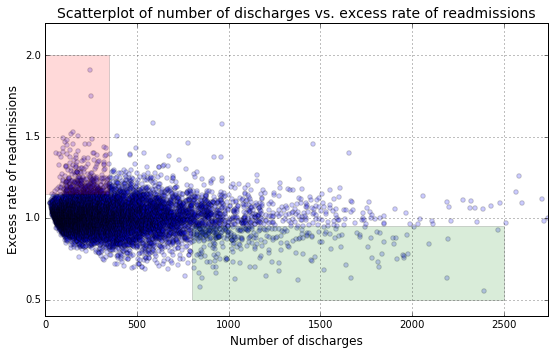

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
hdata = clean_hospital_read_df #renaming long variable name

In [6]:
hdata[hdata['Excess Readmission Ratio']>1].head(10) #Examining some data corresponding to excess readmission ratio > 1

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11,07/01/2010,06/30/2013


Let's plot the expected readmission rates vs the number of discharges.

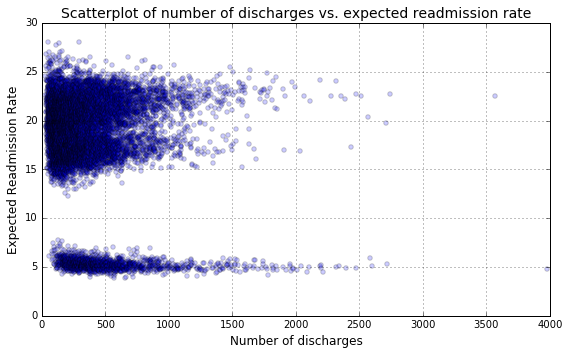

In [7]:
x = [a for a in hdata['Number of Discharges']]
y = list(hdata['Expected Readmission Rate'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.set_xlim([0, 4000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Expected Readmission Rate', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. expected readmission rate', fontsize=14)

ax.grid(True)
fig.tight_layout()

This shows that there is a large discontinuity in the data. This suggests that there may be two groups of expected rates.

If we plot the predicted readmission rates vs number of discharges, we see a similar phenomenon. Also, it seems that the lower clump of points is significantly different on the extreme left between the predicted and expected rates.

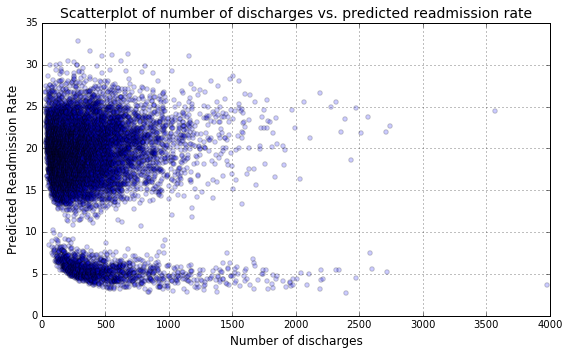

In [8]:
x = [a for a in hdata['Number of Discharges']]
y = list(hdata['Predicted Readmission Rate'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.set_xlim([0, 4000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Predicted Readmission Rate', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. predicted readmission rate', fontsize=14)

ax.grid(True)
fig.tight_layout()

One obvious way to split the samples is  by measure, which represents the different kinds of procedures that patients undergo.

In [9]:
measures = hdata['Measure Name']
umeas = measures.unique()
umeas


array(['READM-30-HIP-KNEE-HRRP', 'READM-30-COPD-HRRP', 'READM-30-AMI-HRRP',
       'READM-30-HF-HRRP', 'READM-30-PN-HRRP'], dtype=object)

So, we can see that there are 5 unique measures in this table.

In [10]:
m1 = hdata[hdata['Measure Name']==umeas[0]]
m2 = hdata[hdata['Measure Name']==umeas[1]]
m3 = hdata[hdata['Measure Name']==umeas[2]]
m4 = hdata[hdata['Measure Name']==umeas[3]]
m5 = hdata[hdata['Measure Name']==umeas[4]]

Having split our data by measure, let's plot the same scatter graph between excess rate of readmissions and number of discharges, but this time, we will color code it.

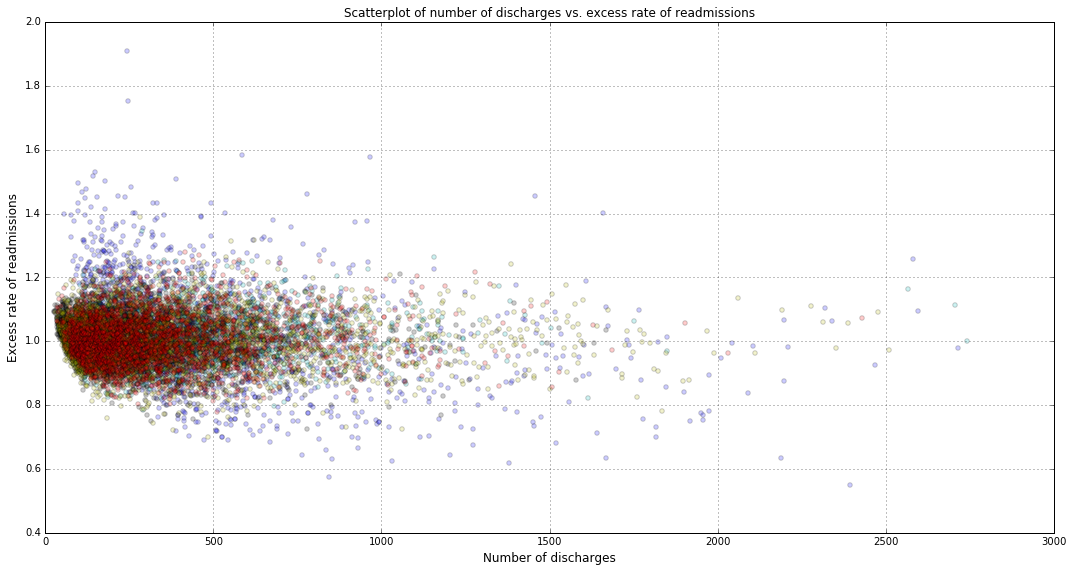

In [11]:
x1 = [a for a in m1['Number of Discharges']]
y1 = list(m1['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x1, y1,alpha=0.2,c='b')

x2 = [a for a in m2['Number of Discharges']]
y2 = list(m2['Excess Readmission Ratio'])
ax.scatter(x2, y2,alpha=0.2,c='c')

x3 = [a for a in m3['Number of Discharges']]
y3 = list(m3['Excess Readmission Ratio'])
ax.scatter(x3, y3,alpha=0.2,c='k')

x4 = [a for a in m4['Number of Discharges']]
y4 = list(m4['Excess Readmission Ratio'])
ax.scatter(x4, y4,alpha=0.2,c='y')

x5 = [a for a in m5['Number of Discharges']]
y5 = list(m5['Excess Readmission Ratio'])
ax.scatter(x5, y5,alpha=0.2,c='r')

ax.set_xlim([0, 3000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions')

ax.grid(True)
fig.tight_layout()

This chart doesn't help us much. Let's do similar color coded charts for the expected and predicted rates vs number of discharges.

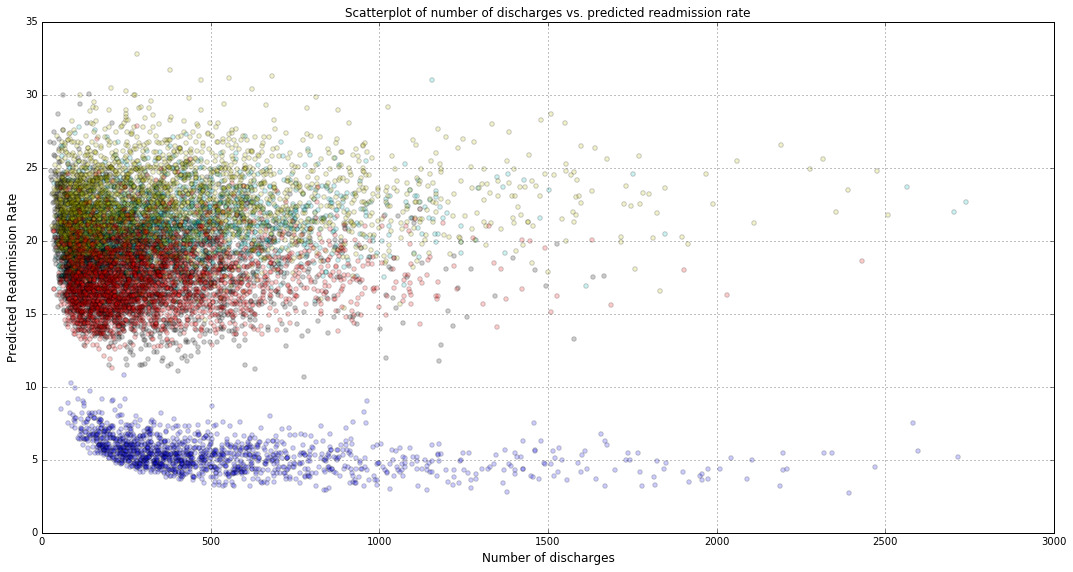

In [12]:
x1 = [a for a in m1['Number of Discharges']]
y1 = list(m1['Predicted Readmission Rate'])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x1, y1,alpha=0.2,c='b')

x2 = [a for a in m2['Number of Discharges']]
y2 = list(m2['Predicted Readmission Rate'])
ax.scatter(x2, y2,alpha=0.2,c='c')

x3 = [a for a in m3['Number of Discharges']]
y3 = list(m3['Predicted Readmission Rate'])
ax.scatter(x3, y3,alpha=0.2,c='k')

x4 = [a for a in m4['Number of Discharges']]
y4 = list(m4['Predicted Readmission Rate'])
ax.scatter(x4, y4,alpha=0.2,c='y')

x5 = [a for a in m5['Number of Discharges']]
y5 = list(m5['Predicted Readmission Rate'])
ax.scatter(x5, y5,alpha=0.2,c='r')

ax.set_xlim([0, 3000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Predicted Readmission Rate', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. predicted readmission rate')

ax.grid(True)
fig.tight_layout()

Here, it becomes very clear that measure M1 or READM-30-HIP-KNEE-HRRP stands out from the rest of the data. The following chart confirms the same conclusion.

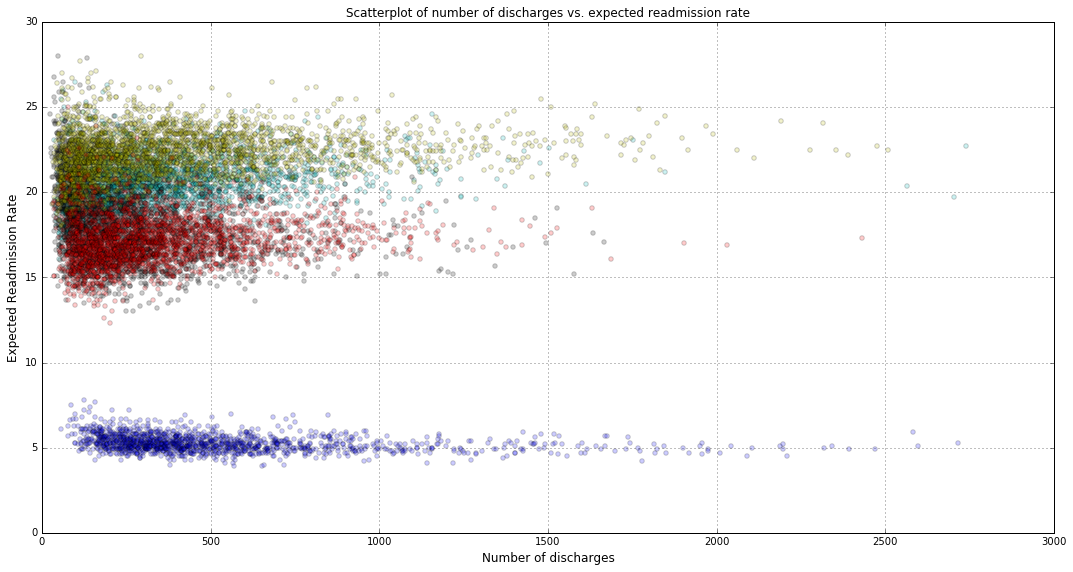

In [13]:
x1 = [a for a in m1['Number of Discharges']]
y1 = list(m1['Expected Readmission Rate'])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x1, y1,alpha=0.2,c='b')

x2 = [a for a in m2['Number of Discharges']]
y2 = list(m2['Expected Readmission Rate'])
ax.scatter(x2, y2,alpha=0.2,c='c')

x3 = [a for a in m3['Number of Discharges']]
y3 = list(m3['Expected Readmission Rate'])
ax.scatter(x3, y3,alpha=0.2,c='k')

x4 = [a for a in m4['Number of Discharges']]
y4 = list(m4['Expected Readmission Rate'])
ax.scatter(x4, y4,alpha=0.2,c='y')

x5 = [a for a in m5['Number of Discharges']]
y5 = list(m5['Expected Readmission Rate'])
ax.scatter(x5, y5,alpha=0.2,c='r')

ax.set_xlim([0, 3000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Expected Readmission Rate', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. expected readmission rate')

ax.grid(True)
fig.tight_layout()

Until now, we have not used the number of readmissions field in the data. Let's plot the readmission ratio vs the number of readmissions to see if we can uncover something.

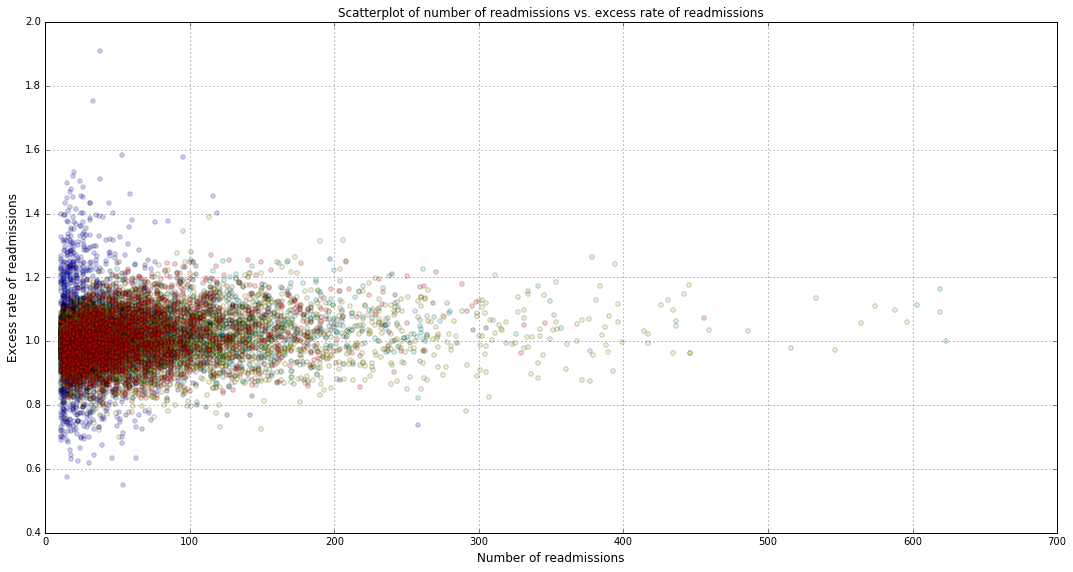

In [14]:
x1 = [a for a in m1['Number of Readmissions']]
y1 = list(m1['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x1, y1,alpha=0.2,c='b')

x2 = [a for a in m2['Number of Readmissions']]
y2 = list(m2['Excess Readmission Ratio'])
ax.scatter(x2, y2,alpha=0.2,c='c')

x3 = [a for a in m3['Number of Readmissions']]
y3 = list(m3['Excess Readmission Ratio'])
ax.scatter(x3, y3,alpha=0.2,c='k')

x4 = [a for a in m4['Number of Readmissions']]
y4 = list(m4['Excess Readmission Ratio'])
ax.scatter(x4, y4,alpha=0.2,c='y')

x5 = [a for a in m5['Number of Readmissions']]
y5 = list(m5['Excess Readmission Ratio'])
ax.scatter(x5, y5,alpha=0.2,c='r')

ax.set_xlim([0, 700])
ax.set_xlabel('Number of readmissions', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of readmissions vs. excess rate of readmissions')

ax.grid(True)
fig.tight_layout()

The above chart brings into sharp focus the fact that while the number of readmissions for READM-30-HIP-KNEE-HRRP are small for any individual hospital, the excess rate varies quite wildly. 

In fact, we can see the same result in the plot of excess readmission rate vs number of discharges, but it's not as pronounced.

Finally, let's plot predicted and expected rates vs number of readmissions. These charts show us that the number for READM-30-HIP-KNEE-HRRP is indeed quite small as compared to the other measures.

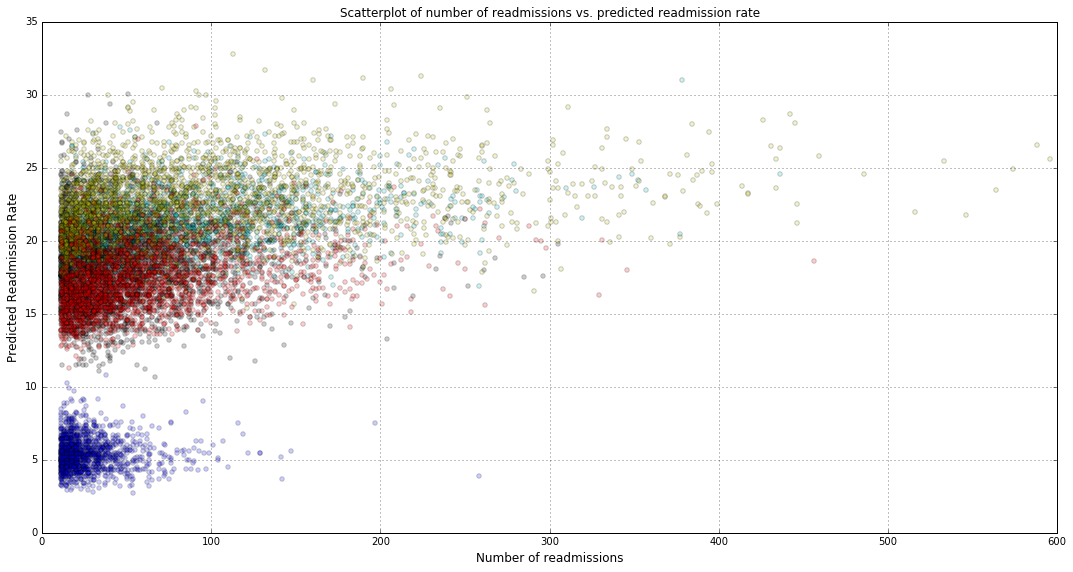

In [15]:
x1 = [a for a in m1['Number of Readmissions']]
y1 = list(m1['Predicted Readmission Rate'])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x1, y1,alpha=0.2,c='b')

x2 = [a for a in m2['Number of Readmissions']]
y2 = list(m2['Predicted Readmission Rate'])
ax.scatter(x2, y2,alpha=0.2,c='c')

x3 = [a for a in m3['Number of Readmissions']]
y3 = list(m3['Predicted Readmission Rate'])
ax.scatter(x3, y3,alpha=0.2,c='k')

x4 = [a for a in m4['Number of Readmissions']]
y4 = list(m4['Predicted Readmission Rate'])
ax.scatter(x4, y4,alpha=0.2,c='y')

x5 = [a for a in m5['Number of Readmissions']]
y5 = list(m5['Predicted Readmission Rate'])
ax.scatter(x5, y5,alpha=0.2,c='r')

ax.set_xlim([0, 600])
ax.set_xlabel('Number of readmissions', fontsize=12)
ax.set_ylabel('Predicted Readmission Rate', fontsize=12)
ax.set_title('Scatterplot of number of readmissions vs. predicted readmission rate')

ax.grid(True)
fig.tight_layout()

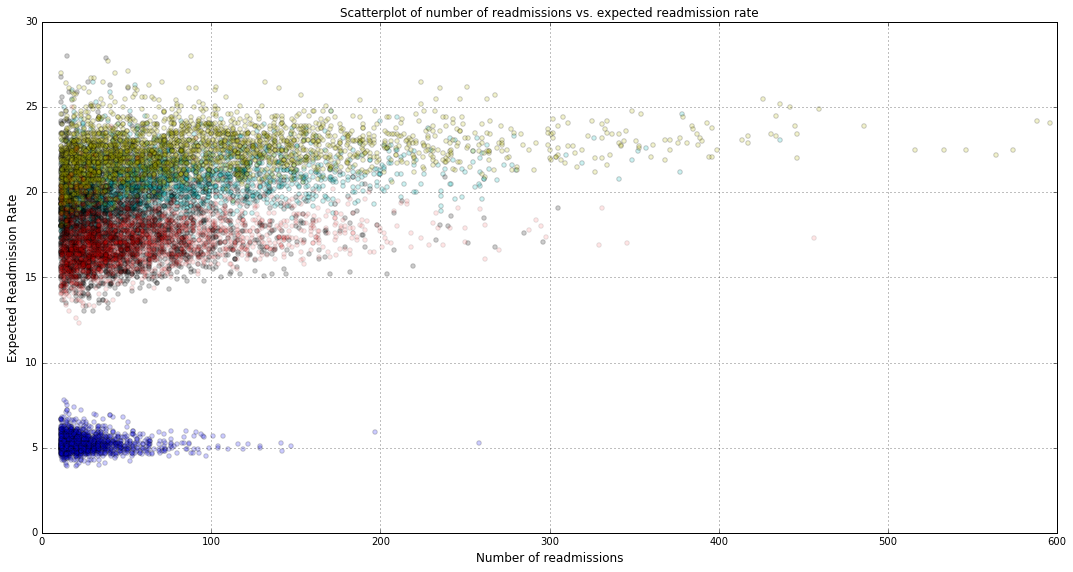

In [16]:
x1 = [a for a in m1['Number of Readmissions']]
y1 = list(m1['Expected Readmission Rate'])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x1, y1,alpha=0.2,c='b')

x2 = [a for a in m2['Number of Readmissions']]
y2 = list(m2['Expected Readmission Rate'])
ax.scatter(x2, y2,alpha=0.2,c='c')

x3 = [a for a in m3['Number of Readmissions']]
y3 = list(m3['Expected Readmission Rate'])
ax.scatter(x3, y3,alpha=0.2,c='k')

x4 = [a for a in m4['Number of Readmissions']]
y4 = list(m4['Expected Readmission Rate'])
ax.scatter(x4, y4,alpha=0.2,c='y')

x5 = [a for a in m5['Number of Readmissions']]
y5 = list(m5['Expected Readmission Rate'])
ax.scatter(x5, y5,alpha=0.1,c='r')

ax.set_xlim([0, 600])
ax.set_xlabel('Number of readmissions', fontsize=12)
ax.set_ylabel('Expected Readmission Rate', fontsize=12)
ax.set_title('Scatterplot of number of readmissions vs. expected readmission rate')

ax.grid(True)
fig.tight_layout()

Now, let's revisit the stats provided to us at the beginning. Let's start by calculating the number of samples in the subsets for number of discharges < 100 and >1000 . We first want to ensure that we get the same data as claimed.


In [17]:
smalldata = hdata[hdata['Number of Discharges']<100]
smallcount = smalldata['State'].count()
smallcount

1269

In [18]:
largedata = hdata[hdata['Number of Discharges']>1000]
largecount = largedata['State'].count()
largecount

463

Calculating the mean excess redamission ratios for the above subsets and verifying the numbers presented in the problem.

In [19]:
smean = smalldata['Excess Readmission Ratio'].mean()
smean

1.0226183501683506

In [20]:
lmean = largedata['Excess Readmission Ratio'].mean()
lmean

0.9783354211663071

The means are correct. Now, let's find out the % of hospitals in each subset that the problem statement claims to have ERR > 1

In [21]:
smalldata[smalldata['Excess Readmission Ratio']>1]['State'].count()/smallcount

0.59180457052797475

In [22]:
largedata[largedata['Excess Readmission Ratio']>1]['State'].count()/largecount

0.44492440604751621

We find that for the subset for hospitals with <100 discharges, the percentage with ERR>1 is actually 59.2% and not 63%.

Now, let's remove measure M1 from the list and re-do the analysis.

In [23]:
smalldata = hdata[(hdata['Number of Discharges']<100) & (hdata['Measure Name']!=umeas[0])]
smallcount = smalldata['State'].count()
smallcount

1235

In [24]:
largedata = hdata[(hdata['Number of Discharges']>1000) & (hdata['Measure Name']!=umeas[0])]
largecount = largedata['State'].count()
largecount

320

In [25]:
smean = smalldata['Excess Readmission Ratio'].mean()
smean

1.019427040816327

In [26]:
lmean = largedata['Excess Readmission Ratio'].mean()
lmean

1.0044496875

To summarize the finding above
With M1 included,
Mean ERR - Small hospitals: 1.023
Mean ERR - Large hospitals: 0.978

Excluding M1,
Mean ERR - Small hospitals: 1.019
Mean ERR - Large hospitals: 1.004

This indicates that aside from the M1 measure, the two sets have similar mean ERRs.

Also, the number of data points went from 1269 and 463 for small and large respectively, to 1235 and 320. This clearly shows that the bulk of M1 cases are handled at hospitals with high discharge numbers.


In [27]:
hdata_exclM1 = hdata[hdata['Measure Name']!=umeas[0]]
#Regenerating the data excluding M1

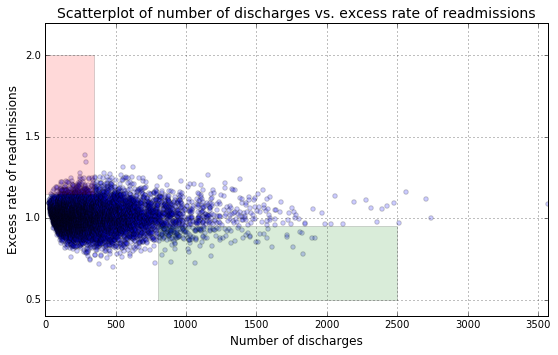

In [28]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in hdata_exclM1['Number of Discharges']]
y = list(hdata_exclM1['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

This figure is notably different from the figure used to motivate the problem, since there are much fewer points in both the red and green rectangles.

So, now that we have identified the problem as being in the M1 measure, let's focus on that. 

In [29]:
m1.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14515,JOHN H STROGER JR HOSPITAL,140124,IL,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14428,ST BERNARD HOSPITAL,140103,IL,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15288,LORETTO HOSPITAL,140083,IL,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


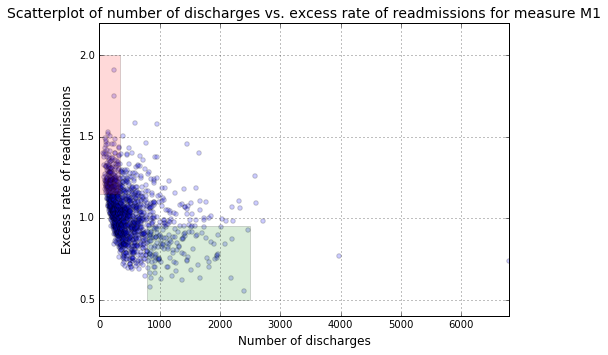

In [30]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in m1['Number of Discharges']]
y = list(m1['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions for measure M1', fontsize=14)

ax.grid(True)
fig.tight_layout()

A rescaled version of the same:

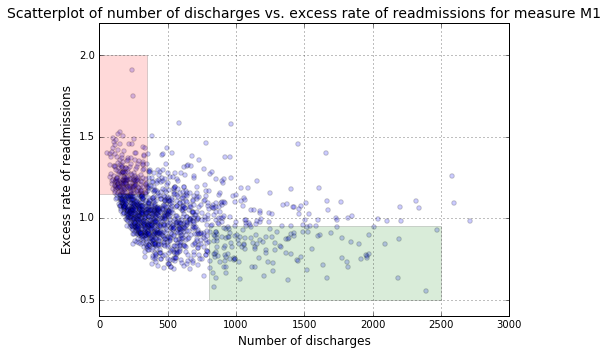

In [31]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in m1['Number of Discharges']]
y = list(m1['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, 3000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions for measure M1', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [ ]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in m1['Number of Discharges']]
y = list(m1['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, 3000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions for measure M1', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [68]:
m1_highERR = m1[m1['Excess Readmission Ratio']>1]
len(m1_highERR)/len(m1)
print('Number of hospitals:',m1_highERR['Excess Readmission Ratio'].count())

print('Mean:',m1_highERR['Excess Readmission Ratio'].mean())
print('Median:',m1_highERR['Excess Readmission Ratio'].median())

Number of hospitals: 754
Mean: 1.1478212201591496
Median: 1.1179999999999999


In [67]:
m2_highERR = m2[m2['Excess Readmission Ratio']>1]
len(m2_highERR)/len(m2)
print('Number of hospitals:',m2_highERR['Excess Readmission Ratio'].count())

print('Mean:',m2_highERR['Excess Readmission Ratio'].mean())
print('Median:',m2_highERR['Excess Readmission Ratio'].median())

Number of hospitals: 1380
Mean: 1.0551427536231894
Median: 1.0429499999999998


In [69]:
m3_highERR = m3[m3['Excess Readmission Ratio']>1]
len(m3_highERR)/len(m3)
print('Number of hospitals:',m3_highERR['Excess Readmission Ratio'].count())

print('Mean:',m3_highERR['Excess Readmission Ratio'].mean())
print('Median:',m3_highERR['Excess Readmission Ratio'].median())

Number of hospitals: 978
Mean: 1.0616366053169746
Median: 1.0549499999999998


In [70]:
m4_highERR = m4[m4['Excess Readmission Ratio']>1]
len(m4_highERR)/len(m4)
print('Number of hospitals:',m4_highERR['Excess Readmission Ratio'].count())

print('Mean:',m4_highERR['Excess Readmission Ratio'].mean())
print('Median:',m4_highERR['Excess Readmission Ratio'].median())

Number of hospitals: 1436
Mean: 1.0667306406685233
Median: 1.05655


In [71]:
m5_highERR = m5[m5['Excess Readmission Ratio']>1]
len(m5_highERR)/len(m5)
print('Number of hospitals:',m5_highERR['Excess Readmission Ratio'].count())

print('Mean:',m5_highERR['Excess Readmission Ratio'].mean())
print('Median:',m5_highERR['Excess Readmission Ratio'].median())

Number of hospitals: 1391
Mean: 1.0650183321351556
Median: 1.0521


This shows that while all measures have ERRs > 1 associated with them, M1 has the highest average and median ERRs.

Let's plot a scatter chart to visualize again, what this looks like:

(0, 2500)

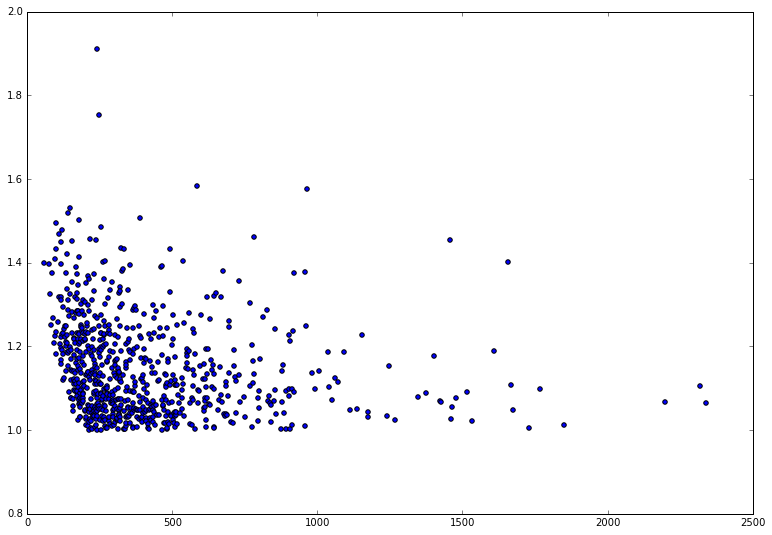

In [78]:
plt.figure(figsize=(13,9))
plt.scatter(m1_highERR['Number of Discharges'],m1_highERR['Excess Readmission Ratio'])
plt.xlim([0,2500])

This seems to suggest that the majority of cases with high ERR lie to the left of the graph, for Number of Discharges < 600 or 700

(array([ 147.,  183.,  124.,   89.,   55.,   47.,   23.,   20.,   16.,
          12.,    5.,    9.]),
 array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1200,
        1400, 1600]),
 <a list of 12 Patch objects>)

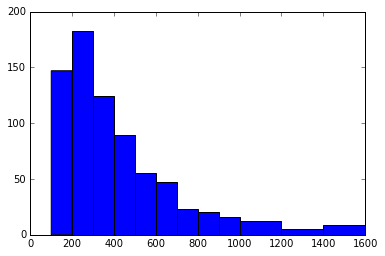

In [100]:
plt.hist(m1_highERR['Number of Discharges'],bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600])

Plotting the histogram confirms that 700 would be an optimal cutoff point for focusing on the biggest offenders.

In [101]:
m1_highERR_lowDis = m1_highERR[m1_highERR['Number of Discharges']<700]

In [102]:
m1_highERR_lowDis.count()

Hospital Name                 657
Provider Number               657
State                         657
Measure Name                  657
Number of Discharges          657
Footnote                        0
Excess Readmission Ratio      657
Predicted Readmission Rate    657
Expected Readmission Rate     657
Number of Readmissions        657
Start Date                    657
End Date                      657
dtype: int64

Now let's see if there is some information we can find in the state-wise distribution.

In [134]:
statedist = m1_highERR_lowDis.sort_values('State')
statedistmean = statedist.groupby('State').mean()
statedistmean.reset_index(inplace=True)
statedistmean.sort_values(by='Excess Readmission Ratio', ascending=False)

,State,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
6,DC,90007.000000,263.333333,NaN,1.321467,6.833333,5.166667,22.333333
23,MO,260127.187500,256.125000,NaN,1.231775,6.612500,5.331250,20.000000
19,MD,210032.894737,348.157895,NaN,1.221405,6.584211,5.378947,25.842105
2,AZ,30080.250000,229.583333,NaN,1.200042,5.750000,4.800000,16.000000
44,VA,490067.636364,346.954545,NaN,1.198955,6.004545,5.009091,23.409091
30,NJ,310055.217391,307.000000,NaN,1.193943,7.073913,5.900000,23.695652
12,ID,130007.500000,280.500000,NaN,1.190900,6.300000,5.300000,20.500000
11,IA,160067.000000,386.250000,NaN,1.187050,5.850000,4.875000,26.000000
42,TX,473839.893617,301.808511,NaN,1.175830,6.172340,5.244681,20.978723
28,NE,280086.000000,227.500000,NaN,1.173150,5.800000,4.950000,16.000000


In summary, I would make the following recommendations:

1. All hospitals would benefit from reviewing their estimation for M1 procedure.
2. Hospitals with fewer discharges of the M1 procedure are more likely to end up with ERR>1. So, they should be particularly careful while estimating and performing this procedure.